In [1]:
import numpy as np
import pandas as pd
import math
pd.options.display.max_rows = 4000

In [2]:
df = pd.read_csv("datasets/Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.groupby("area_type").agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [4]:
df.drop(['area_type','availability','society','balcony'],axis=1,inplace=True)

In [5]:
df.shape

(13320, 5)

In [6]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().any()

location      False
size          False
total_sqft    False
bath          False
price         False
dtype: bool

In [9]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [10]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [11]:
def extractNum(s):
    num=0
    i = 0
    while s[i]>='0' and s[i]<='9':
        num = num*10+ int(s[i])
        i+=1
    return num

In [12]:
print(extractNum("2 bhk"))

2


In [13]:
df['size']=df['size'].apply(extractNum)

In [14]:
df['size'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df.to_csv('ygug.csv')

In [16]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def rangeToMean(x):
    try:
        float(x)
    except:
        nums = x.split('-')
        try:
            float((float(nums[0])+float(nums[1]))/2)
        except:
            return None
        return float((float(nums[0])+float(nums[1]))/2)
    return float(x)

In [18]:
df['total_sqft'] = df['total_sqft'].apply(rangeToMean)

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().any()

location      False
size          False
total_sqft    False
bath          False
price         False
dtype: bool

In [21]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2.0,39.07
1,Chikka Tirupathi,4,2600.0,5.0,120.00
2,Uttarahalli,3,1440.0,2.0,62.00
3,Lingadheeranahalli,3,1521.0,3.0,95.00
4,Kothanur,2,1200.0,2.0,51.00


In [22]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
0,Electronic City Phase II,2,1056.0,2.0,39.07,3699.810606
1,Chikka Tirupathi,4,2600.0,5.0,120.00,4615.384615
2,Uttarahalli,3,1440.0,2.0,62.00,4305.555556
3,Lingadheeranahalli,3,1521.0,3.0,95.00,6245.890861
4,Kothanur,2,1200.0,2.0,51.00,4250.000000


## Outlier Detection and Removal

In [23]:
df = df[~(df['total_sqft']/df['size']<300)]

In [24]:
df['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [25]:
# removing outliers for location-wise price_per_sqft  
df.location=df.location.apply(lambda x: x.strip())
l= df.groupby('location')
new_df = pd.DataFrame()
for key, group in l:
    if(len(group)>1):
        m = np.mean(df['price_per_sqft'])
        std = np.std(df['price_per_sqft'])
        red_df = group[((group['price_per_sqft']>=(m-std)) & (group['price_per_sqft']<=(m+std)))]
        new_df = pd.concat([new_df, red_df])
df = new_df

In [26]:
df.shape

(10959, 6)

In [27]:
df['size'].unique()

array([ 3,  1,  4,  2,  5,  6,  7,  8,  9, 16, 10], dtype=int64)

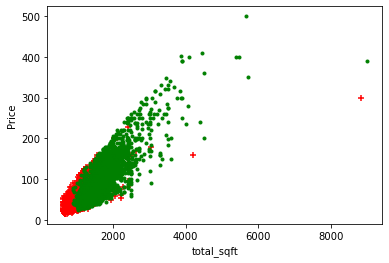

<Figure size 1080x360 with 0 Axes>

In [28]:
import matplotlib.pyplot as plt
plt.scatter(df[df['size']==2]['total_sqft'],df[df['size']==2]['price'],color='red',marker='+')
plt.scatter(df[df['size']==3]['total_sqft'],df[df['size']==3]['price'],color='green',marker='.')
plt.xlabel("total_sqft")
plt.ylabel("Price")
plt.figure(figsize=(15,5))
plt.show()

## Visualisation with datashader

C:\Users\Abhay\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\Abhay\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\Users\Abhay\anaconda3\lib\site-packages\dask\dataframe\utils.py:369: FutureWarning: pandas.UInt64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)


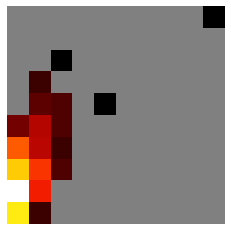

In [29]:
import datashader as ds
import colorcet as cc
bhk_2 = df[df['size']==2]
x_r = [bhk_2['total_sqft'].min(),bhk_2['total_sqft'].max()]
y_r = [bhk_2['price'].min(),bhk_2['price'].max()]
cvs = ds.Canvas(plot_width=10, plot_height=10,x_range=x_r,y_range=y_r)  # auto range or provide the `bounds` argument
agg = cvs.points(bhk_2, 'total_sqft', 'price')  # this is the histogram
img = ds.tf.set_background(ds.tf.shade(agg, how="log", cmap=cc.fire), "grey").to_pil()  # create a rasterized image
plt.imshow(img)
plt.axis('off')
plt.show()

In [30]:
def bhk_outlier(d,location):
    plt.title(location)
    plt.xlabel("total Sqft Area")
    plt.ylabel("Price")
    d_loc = d[d['location']==location]
    bhk_2 = d_loc[d_loc['size']==2]
    bhk_3 = d_loc[d_loc['size']==3]
    plt.scatter(bhk_2['total_sqft'],bhk_2['price'],marker='+',label='2 bhk',color='green')
    plt.scatter(bhk_3['total_sqft'],bhk_3['price'],marker='.',label='3_bhk',color='blue')
    plt.legend()
    plt.show()

In [31]:
# unique_locations = df.location.unique()
# for location in unique_locations:
#     bhk_outlier(df,location)
#     print('\n\n\n')

In [32]:
df.head()

,location,size,total_sqft,bath,price,price_per_sqft
5610,1st Block BEL Layout,3,1540.0,3.0,85.0,5519.480519
8470,1st Block HBR Layout,1,600.0,1.0,45.0,7500.000000
12564,1st Block HBR Layout,4,3150.0,4.0,150.0,4761.904762
2308,1st Block HRBR Layout,3,2300.0,3.0,80.0,3478.260870
7715,1st Block HRBR Layout,2,1250.0,2.0,67.0,5360.000000


In [33]:
def bhk_outlier_remover():
    exclude_indices = np.array([])
    for loc,loc_df in df.groupby('location'):
        # creating stats {mean,count,std} for each bhk
        stats = {}
        bhks = loc_df.groupby('size')
        for bhk,bhk_group in bhks:
            stats[bhk] = {
                'mean':np.mean(bhk_group['price_per_sqft']) ,
                'std': np.std(bhk_group['price_per_sqft']),
                'count':bhk_group.shape[0]
            }
#         print(stats)
        # adding indexes coressponding to rows where price_per_sqft of bhk_n is less than mean of price_per_sqft of bhk_n-1 into exclude_indices
        for bhk,bhk_group in bhks:
            stats_prev = stats.get(bhk-1)
            if stats_prev and stats_prev['count']>5:
                index_to_del = bhk_group[bhk_group['price_per_sqft'] < (stats_prev['mean'])].index.values
                exclude_indices = np.append(exclude_indices,index_to_del)
    return df.drop(exclude_indices)

In [34]:
df2 = bhk_outlier_remover()

In [35]:
df2.shape

(8764, 6)

In [36]:
df.shape

(10959, 6)

In [37]:
# df.location =df.location.apply(lambda x: x.strip())
# location_stats = df.groupby('location')['location'].agg('count')
# location_stats

In [38]:
len(df2.location.unique())

752

### model training

In [39]:
df2.drop('price_per_sqft',axis=1,inplace=True)

In [40]:
df2.head()

,location,size,total_sqft,bath,price
5610,1st Block BEL Layout,3,1540.0,3.0,85.0
8470,1st Block HBR Layout,1,600.0,1.0,45.0
12564,1st Block HBR Layout,4,3150.0,4.0,150.0
2308,1st Block HRBR Layout,3,2300.0,3.0,80.0
7715,1st Block HRBR Layout,2,1250.0,2.0,67.0


In [41]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
ohe = OneHotEncoder()

In [43]:
ohe.fit(df2[['location']])

OneHotEncoder()

In [44]:
location_encoding = ohe.transform(df2[['location']]).toarray()
location_encoding.shape

(8764, 752)

In [45]:
ohe.categories_

[array(['1st Block BEL Layout', '1st Block HBR Layout',
        '1st Block HRBR Layout', '1st Block Jayanagar',
        '1st Block Koramangala', '1st Phase JP Nagar',
        '1st Stage Indira Nagar', '2nd Block Bel Layout',
        '2nd Block Hrbr Layout', '2nd Block Jayanagar',
        '2nd Phase JP Nagar', '2nd Phase Judicial Layout',
        '2nd Stage Arekere Mico Layout', '2nd Stage Nagarbhavi',
        '3rd Block Banashankari', '3rd Block Hrbr Layout',
        '3rd Block Jayanagar', '3rd Block Koramangala',
        '3rd Phase JP Nagar', '4th Block Jayanagar',
        '4th Block Koramangala', '4th Phase JP Nagar',
        '4th T block Jayanagar', '5th Block Hbr Layout',
        '5th Phase JP Nagar', '5th Stage BEML Layout',
        '6th Phase JP Nagar', '6th block Koramangala',
        '7th Block Jayanagar', '7th Phase JP Nagar', '8th Block Jayanagar',
        '8th Phase JP Nagar', '8th block Koramangala',
        '9th Phase JP Nagar', 'A Narayanapura', 'AECS Layout',
        'AG

In [46]:
x = np.append(location_encoding[:,1:],np.array(df2.drop(['location','price'],axis=1)),axis=1)
x

array([[0.00e+00, 0.00e+00, 0.00e+00, ..., 3.00e+00, 1.54e+03, 3.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 1.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, ..., 4.00e+00, 3.15e+03, 4.00e+00],
       ...,
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.00e+00, 8.80e+02, 2.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 2.00e+00, 1.00e+03, 2.00e+00],
       [0.00e+00, 0.00e+00, 0.00e+00, ..., 3.00e+00, 1.40e+03, 2.00e+00]])

In [47]:
y = df2['price']
y.shape

(8764,)

In [48]:
x.shape

(8764, 754)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [50]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [51]:
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

-1667207110599217.2

In [52]:
from sklearn.model_selection import GridSearchCV,cross_val_score,ShuffleSplit
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

In [53]:
choices = {
    'lr':{
        'model':LinearRegression(),
        'params':{
            'normalize':[True,False]
        }
    },
    'lasso': {
        'model':Lasso(),
        'params':{
            'alpha':[1,2],
            'selection' : ['cyclic', 'random']
        }
    },
    'tree': {
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion' : ["mse", "friedman_mse"],
            'splitter' : ["best", "random"]
        }
    }
}

In [54]:
def best_model_param_pair(choices):
    cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    data = []
    for mn,mp in choices.items():
        gs = GridSearchCV(mp['model'],mp['params'],cv=cv)
        gs.fit(x,y)
        data.append({
        'model':mn,
        'best_score': gs.best_score_,
        'best_params':gs.best_params_
        })
    return pd.DataFrame(data)
daaa= best_model_param_pair(choices)
daaa

,model,best_score,best_params
0,lr,-7.365020e+14,{'normalize': False}
1,lasso,8.020881e-01,"{'alpha': 1, 'selection': 'random'}"
2,tree,7.988632e-01,"{'criterion': 'mse', 'splitter': 'random'}"


In [55]:
def predict(location,bhk,tsqft,bath):
    x=ohe.transform([[location]]).toarray()
    x=np.append(x[:,1:],np.array([bhk,tsqft,bath]))
    print(lr.predict(x.reshape(1,-1)))

In [56]:
predict('Devarabeesana Halli',2,1100.0,2.0)

[94.38034082]


In [57]:
df2[df2.location=='Devarabeesana Halli'][df2.total_sqft==1100]

<ipython-input-57-5d7303250545>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[df2.location=='Devarabeesana Halli'][df2.total_sqft==1100]


,location,size,total_sqft,bath,price
2764,Devarabeesana Halli,2,1100.0,2.0,70.0


In [58]:
predict('1st Block BEL Layout',3,1540.0,3.0)

[84.99999962]


In [59]:
import pickle
with open('banglore_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr,f)

In [60]:
with open('location_encoder.pickle','wb') as l:
    pickle.dump(ohe,l)

In [61]:
with open('location_encoder.pickle','rb') as lc:
    le= pickle.load(lc)
loc = le.categories_[0]
loc[0]

'1st Block BEL Layout'

In [65]:
le.transform([['1st Block BEL Layout']]).toarray()[0][1:]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.